In [14]:
import pandas as pd

df = pd.read_csv('final.csv')

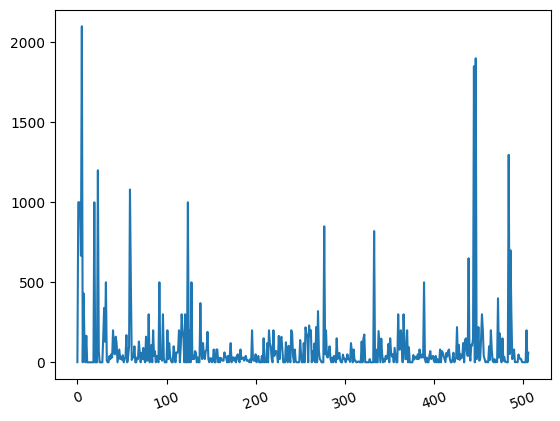

<Figure size 2000x2000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(df["DR"])
plt.xticks(rotation=20)
plt.figure(figsize = (20, 20))
plt.show()

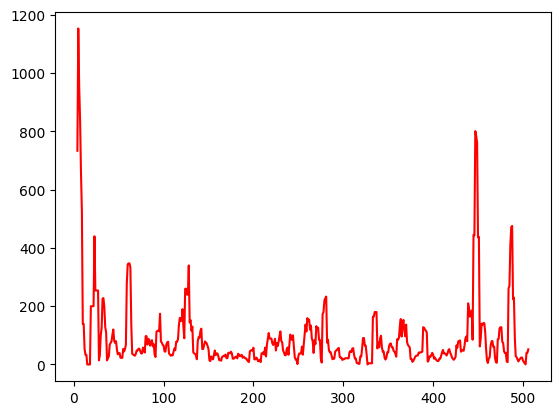

In [16]:
rollingseries = df['DR'].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()

In [17]:
from statsmodels.tsa.holtwinters import Holt



In [18]:
dr = df["DR"]

In [19]:
dr

0         1.00
1      1000.00
2      1000.00
3      1000.00
4       666.00
        ...   
502       0.05
503       0.00
504     200.00
505       0.00
506      60.00
Name: DR, Length: 507, dtype: float64

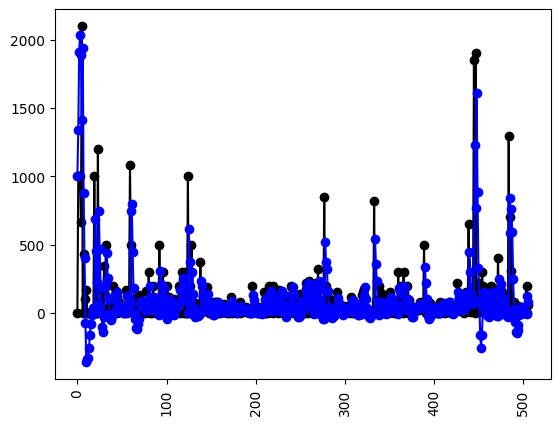

In [20]:
fit1 = Holt(dr).fit()  #linear trend
plt.plot(dr, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.xticks(rotation="vertical")
plt.show()

In [21]:
dr.head()

0       1.0
1    1000.0
2    1000.0
3    1000.0
4     666.0
Name: DR, dtype: float64

In [22]:
df.head()

,Unnamed: 0,Date,DR,CR,Balance,UPI_ID
0,0,2024-04-05,1.0,0.0,5962.21,zoro.sanji12op@
1,1,2024-04-05,1000.0,0.0,4962.21,zoro.sanji12op@
2,2,2024-04-05,1000.0,0.0,3962.21,zoro.sanji12op@
3,3,2024-04-05,1000.0,0.0,2962.21,zoro.sanji12op@
4,4,2024-04-05,666.0,0.0,2296.21,zoro.sanji12op@


In [23]:
import numpy as np
df['DR'] = np.log1p(df['DR'])  # Handles 0s too


In [24]:
df.head()

,Unnamed: 0,Date,DR,CR,Balance,UPI_ID
0,0,2024-04-05,0.693147,0.0,5962.21,zoro.sanji12op@
1,1,2024-04-05,6.908755,0.0,4962.21,zoro.sanji12op@
2,2,2024-04-05,6.908755,0.0,3962.21,zoro.sanji12op@
3,3,2024-04-05,6.908755,0.0,2962.21,zoro.sanji12op@
4,4,2024-04-05,6.502790,0.0,2296.21,zoro.sanji12op@


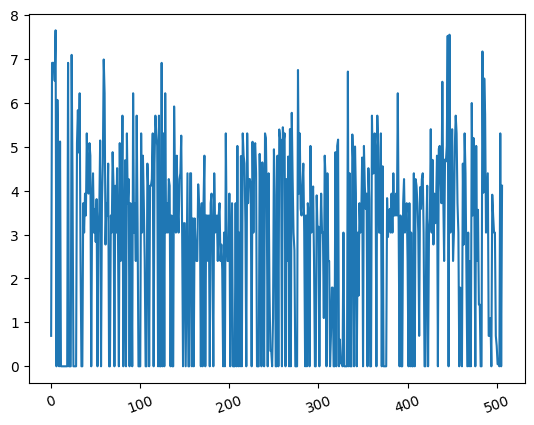

<Figure size 2000x2000 with 0 Axes>

In [25]:
plt.plot(df["DR"])
plt.xticks(rotation=20)
plt.figure(figsize = (20, 20))
plt.show()

In [26]:
df['Date'] = pd.to_datetime(df['Date']) 
df = df.sort_values('Date')
Daily_amt = df.groupby('Date')['DR'].sum().reset_index()


In [27]:
Day = df.drop_duplicates(subset='Date', keep='first')


In [28]:
df.head()

,Unnamed: 0,Date,DR,CR,Balance,UPI_ID
0,0,2024-04-05,0.693147,0.0,5962.21,zoro.sanji12op@
7,7,2024-04-05,6.066108,0.0,266.21,zoro.sanji12op@
6,6,2024-04-05,0.000000,500.0,696.21,vivsri14@oksbi
5,5,2024-04-05,7.650169,0.0,196.21,zoro.sanji12op@
8,8,2024-04-05,4.615121,0.0,166.21,zoro.sanji12op@


In [116]:
df['Date'] = pd.to_datetime(df['Date'])  # Make sure it's in datetime format
daily_sum = df.groupby('Date')['DR'].sum().reset_index()


In [117]:
daily_sum

,Date,DR
0,2024-04-05,46.253599
1,2024-04-06,23.380338
2,2024-04-07,10.913287
3,2024-04-08,32.909248
4,2024-04-09,35.640976
...,...,...
127,2025-03-14,0.693147
128,2025-03-23,0.561314
129,2025-03-26,5.303305
130,2025-03-30,0.000000


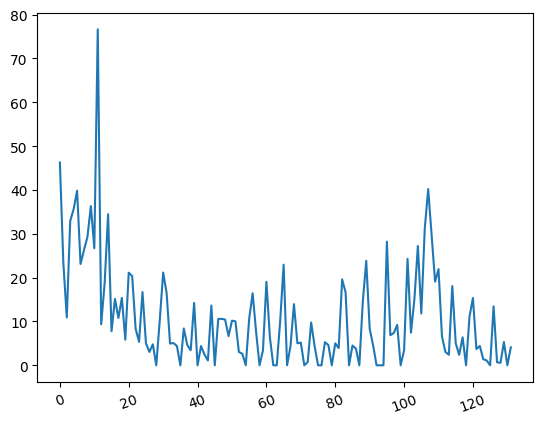

<Figure size 2000x2000 with 0 Axes>

In [118]:
plt.plot(daily_sum["DR"])
plt.xticks(rotation=20)
plt.figure(figsize = (20, 20))
plt.show()

In [119]:
daily_sum.set_index('Date', inplace=True)


In [120]:
daily_sum.head()

,DR
Date,
2024-04-05,46.253599
2024-04-06,23.380338
2024-04-07,10.913287
2024-04-08,32.909248
2024-04-09,35.640976


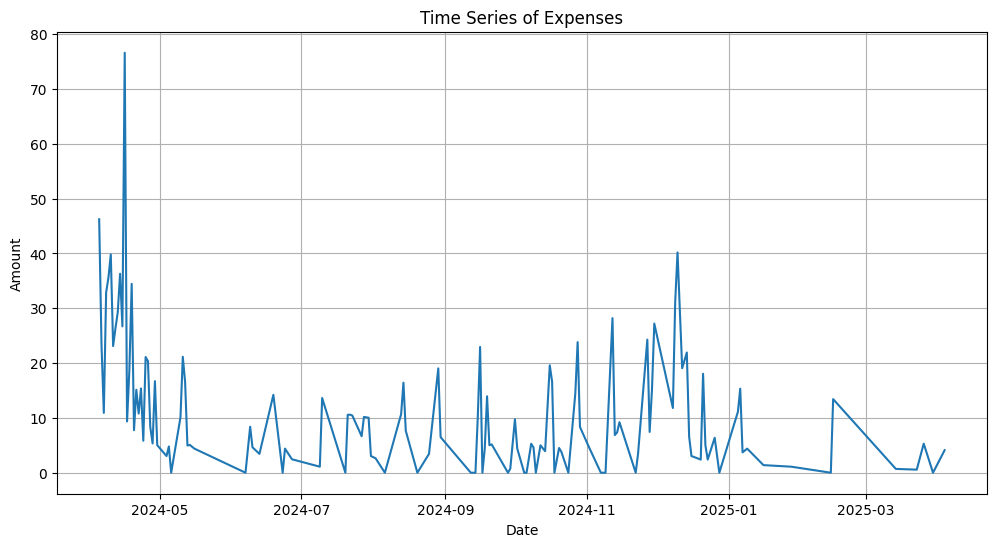

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sum['DR'])
plt.title('Time Series of Expenses')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [123]:


result = adfuller(daily_sum['DR'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Time series is non-stationary. Differencing is needed.")
else:
    print("Time series is stationary. You can use ARIMA directly.")


ADF Statistic: -3.239208695240775
p-value: 0.01782438439702027
Time series is stationary. You can use ARIMA directly.


In [124]:
model = ARIMA(daily_sum['DR'], order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -486.052
Date:                Thu, 10 Apr 2025   AIC                            978.103
Time:                        03:05:01   BIC                            986.729
Sample:                             0   HQIC                           981.608
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.093      0.409      0.683      -0.144       0.220
ma.L1         -0.7807      0.078     -9.977      0.000      -0.934      -0.627
sigma2        97.1285      7.643     12.709      0.0

c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
daily_sum.head()

,DR
Date,
2024-04-05,46.253599
2024-04-06,23.380338
2024-04-07,10.913287
2024-04-08,32.909248
2024-04-09,35.640976


In [ ]:
model = ARIMA(daily_sum['DR'], order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -486.052
Date:                Thu, 10 Apr 2025   AIC                            978.103
Time:                        01:48:59   BIC                            986.729
Sample:                             0   HQIC                           981.608
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.093      0.409      0.683      -0.144       0.220
ma.L1         -0.7807      0.078     -9.977      0.000      -0.934      -0.627
sigma2        97.1285      7.643     12.709      0.0

c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


132    3.497665
133    3.474435
134    3.473555
135    3.473522
136    3.473521
137    3.473521
138    3.473521
139    3.473521
140    3.473521
141    3.473521
Name: predicted_mean, dtype: float64


c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


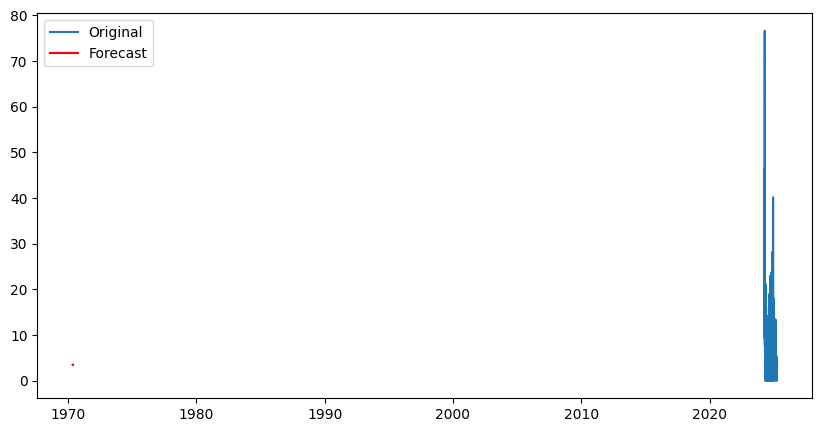

In [ ]:
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sum['DR'], label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
result = adfuller(daily_sum['DR'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Time series is non-stationary. Differencing is needed.")
else:
    print("Time series is stationary. You can use ARIMA directly.")


ADF Statistic: -3.239208695240775
p-value: 0.01782438439702027
Time series is stationary. You can use ARIMA directly.


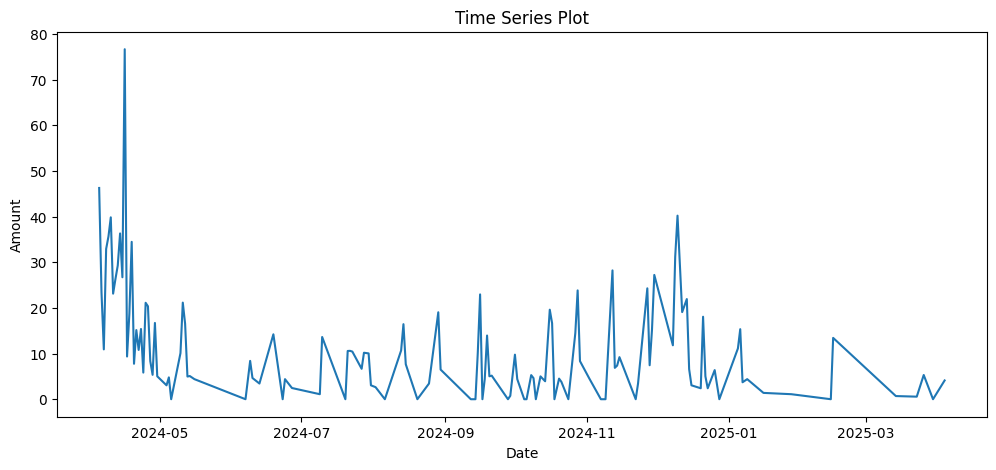

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_sum['DR'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


In [ ]:
daily_sum.index.unique()

DatetimeIndex(['2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-13', '2024-04-14',
               ...
               '2025-01-09', '2025-01-16', '2025-01-28', '2025-02-14',
               '2025-02-15', '2025-03-14', '2025-03-23', '2025-03-26',
               '2025-03-30', '2025-04-04'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

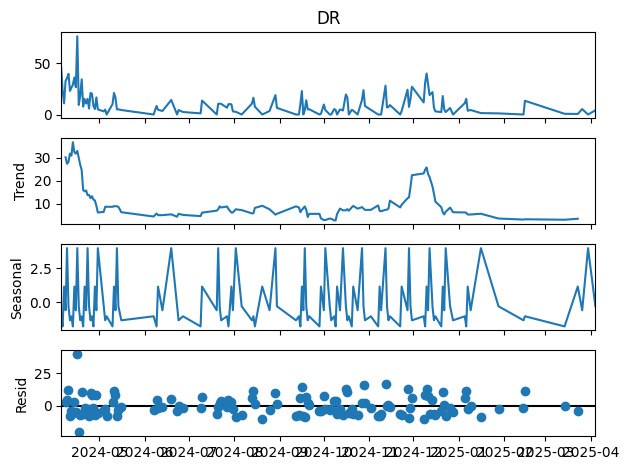

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# # If not already, set the index to datetime
# daily_sum['Date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Decompose (set period based on your frequency — e.g., 12 for monthly, 7 for weekly)
result = seasonal_decompose(daily_sum['DR'], model='additive', period=7)

result.plot()
plt.show()


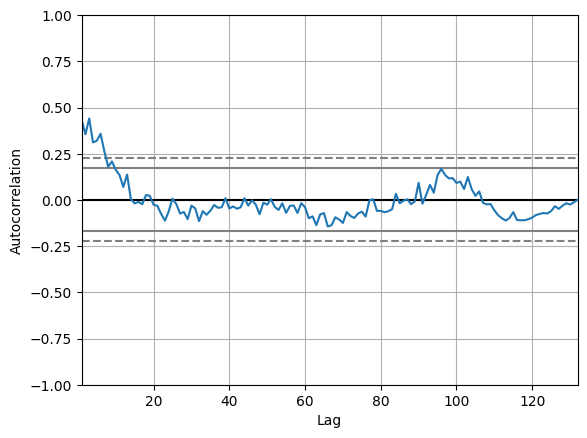

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(daily_sum['DR'])
plt.show()


c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWa

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -486.052
Date:                Thu, 10 Apr 2025   AIC                            978.103
Time:                        02:15:00   BIC                            986.729
Sample:                             0   HQIC                           981.608
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.093      0.409      0.683      -0.144       0.220
ma.L1         -0.7807      0.078     -9.977      0.000      -0.934      -0.627
sigma2        97.1285      7.643     12.709      0.0

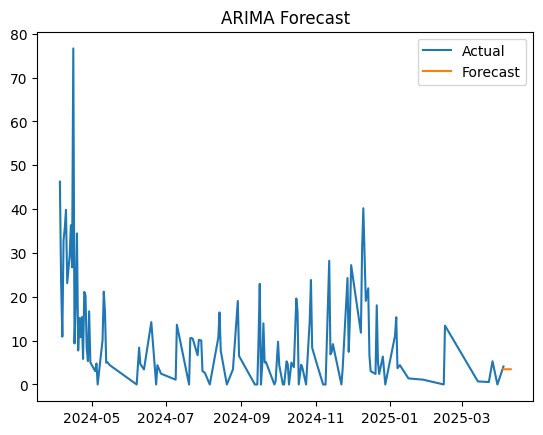

In [ ]:
model = ARIMA(daily_sum['DR'], order=(1, 1, 1))
result = model.fit()

# Summary
print(result.summary())

# Forecasting
forecast = result.forecast(steps=7)
plt.plot(daily_sum.index, daily_sum['DR'], label='Actual')
plt.plot(pd.date_range(daily_sum.index[-1], periods=7, freq='D'), forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: divide by zer

                                     SARIMAX Results                                      
Dep. Variable:                                 DR   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -1648.968
Date:                            Thu, 10 Apr 2025   AIC                           3307.936
Time:                                    02:15:45   BIC                           3319.106
Sample:                                         0   HQIC                          3312.367
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0603         -0       -inf      0.000       0.060       0.060
ma.L1         -0.6154         -0   

c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rushil Misra\Documents\projects\Expense Manager\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


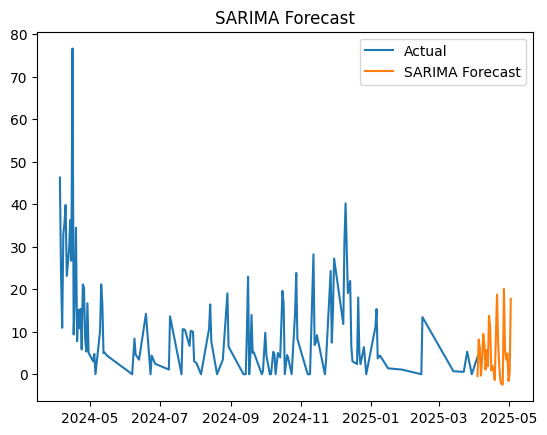

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA (p, d, q) x (P, D, Q, s)
sarima_model = SARIMAX(daily_sum['DR'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 30),  # Example: yearly seasonality (monthly data)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

# Forecast
sarima_forecast = sarima_result.forecast(steps=30)
plt.plot(daily_sum.index, daily_sum['DR'], label='Actual')
plt.plot(pd.date_range(daily_sum.index[-1], periods=30, freq='D'), sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


In [ ]:
daily_sum

,DR
Date,
2024-04-05,46.253599
2024-04-06,23.380338
2024-04-07,10.913287
2024-04-08,32.909248
2024-04-09,35.640976
...,...
2025-03-14,0.693147
2025-03-23,0.561314
2025-03-26,5.303305


In [ ]:
daily_sum = daily_sum.asfreq('D')
daily_sum['DR'] = daily_sum['DR'].fillna(0)  # or use forward fill: .ffill()


In [ ]:
daily_sum

,DR
Date,
2024-04-05,46.253599
2024-04-06,23.380338
2024-04-07,10.913287
2024-04-08,32.909248
2024-04-09,35.640976
...,...
2025-03-31,0.000000
2025-04-01,0.000000
2025-04-02,0.000000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_sum['DR'], order=(1,1,1))
result = model.fit()


In [ ]:
print(result)

In [ ]:
forecast = result.forecast(steps=7)

future_dates = pd.date_range(daily_sum.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

forecast_series = pd.Series(forecast, index=future_dates)


In [ ]:
forecast_series

2025-04-05    1.797815
2025-04-06    1.211999
2025-04-07    1.063633
2025-04-08    1.026057
2025-04-09    1.016541
2025-04-10    1.014130
2025-04-11    1.013520
Freq: D, Name: predicted_mean, dtype: float64

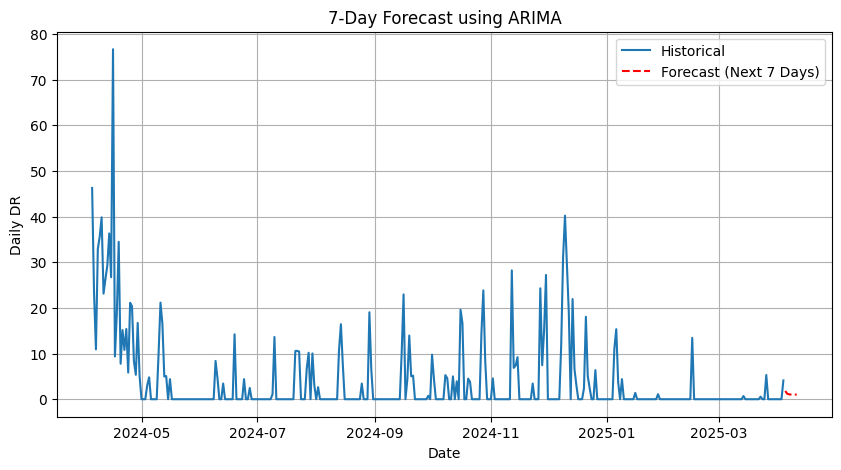

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(daily_sum.index, daily_sum['DR'], label='Historical')
plt.plot(forecast_series.index, forecast_series, label='Forecast (Next 7 Days)', color='red', linestyle='--')
plt.title("7-Day Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Daily DR")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()
